<a href="https://colab.research.google.com/github/foxtrotmike/CS909/blob/master/barebones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Representation, Evaluation and Optimization Framework in PyTorch

(Fayyaz Minhas)

Machine learning models, at their core, consist of three main components: Representation, Evaluation, and Optimization. Understanding these components is crucial for developing and training models effectively. In this tutorial, we'll explore these concepts through a single neuron model example implemented in PyTorch, a popular machine learning library.


## Representation

In machine learning, representation refers to how input data is transformed into a form that the model can understand and work with. This transformation is achieved through a combination of model architecture and the weights that define the specific model instance.

###  Linear or Single Neuron Model
Our example focuses on a linear model or a single neuron model, which can be thought of as the simplest form of a neural network. This neuron takes inputs, applies a weighted sum followed by an activation function (if any), and produces an output. The weights (including a bias term) determine how much influence each input has on the output.

## Evaluation
Evaluation is about measuring how well the model performs. This measurement is done using a loss function, which quantifies the difference between the predicted outputs of the model and the actual target values.

### Loss Functions
In our example, different loss functions are implemented, such as hinge loss, squared loss, and logistic loss. These functions evaluate the performance of our model during training. The choice of loss function depends on the specific problem being solved.

## Optimization
Optimization is the process of adjusting the model's weights to minimize the loss. This process involves calculating gradients (using automatic differentiation [https://en.wikipedia.org/wiki/Automatic_differentiation]) and updating the weights in the direction that reduces the loss.

### Gradient Descent
Our model uses gradient descent for optimization, facilitated by PyTorch's automatic differentiation and optimization tools. The backward() method calculates gradients, and the optimizer updates the weights.


Let's dive in. You can ignore the plotting code below.


Understanding Automatic Differentiation: A Functional Perspective
Automatic differentiation (AD) is a powerful technique used in machine learning and numerical computations to efficiently and accurately calculate derivatives of functions. This concept is crucial for optimizing functions, such as loss functions in neural networks, where we need to adjust parameters to minimize loss. Let's explore AD through a simple PyTorch example, focusing on its functional perspective.

The Basics of Automatic Differentiation
Automatic differentiation computes the derivative of a function automatically through the computation graph. A computation graph is a representation of the function where nodes represent operations or variables, and edges represent the flow of data. AD computes derivatives using the chain rule, traversing this graph from outputs back to inputs.

A Simple Example with PyTorch
PyTorch is a popular library that supports automatic differentiation via its autograd system. Let's consider a simple function to understand how AD works:
$$P(w) = w^2$$

where $w$ is a variable.

Step 1: Define the Function and Variable
First, we define a function P and a variable w with requires_grad=True, which tells PyTorch to track operations on w for automatic differentiation.


In [ ]:
import torch

def P_fun(w):
    return w**2

w = torch.randn(1, requires_grad=True)


In this code, torch.randn(1, requires_grad=True) creates a tensor with a random value, and requires_grad=True indicates that we want PyTorch to compute gradients with respect to this tensor.

Step 2: Compute the Output
We then compute the output of the function P(w) for our variable w.

In [ ]:
out = P_fun(w)

This step involves applying the function P to  w, resulting in out, which represents P(w).

Step 3: Automatic Differentiation with backward()
To compute the derivative of P with respect to w, we invoke out.backward(). This call computes the gradient of out with respect to all variables that have requires_grad=True.

In [ ]:
out.backward()

Step 4: Accessing the Gradient
Finally, to access the gradient of w, we use w.grad. This gives us the derivative of P(w) with respect to w, evaluated at the value of w.



In [ ]:
print(w.grad)


This prints the gradient of P(w) = w*w which is 2w, evaluated at the current value of w.

Understanding the Functional Perspective
From a functional perspective, automatic differentiation allows us to abstract away the derivative computation. We simply define the function in terms of basic operations and let AD handle the complex derivative calculations. This is incredibly powerful for machine learning, where the functions (like neural networks) can be highly complex.

The key takeaways are:

* Automatic Differentiation: Efficiently computes derivatives using the computation graph and the chain rule.

* Functional Abstraction: Allows us to focus on defining functions without worrying about how to differentiate them.
* PyTorch and autograd: Provides a user-friendly interface for AD, enabling deep learning and other computational tasks.

Let's dive in to solve an optimization problem using the REO framework with automatic differentiation provided by PyTorch.

## REO with PyTorch

You can ignore the plotting code below.

In [1]:
# -*- coding: utf-8 -*-
"""
@author: Dr. Fayyaz Minhas
2D Scatter Plotter for Classification
"""
from numpy.random import randn #importing randn
import numpy as np #importing numpy
import matplotlib.pyplot as plt #importing plotting module
import itertools
import warnings

def plotit(X,Y=None,clf=None,  conts = None, ccolors = ('b','k','r'), colors = ('c','y'), markers = ('s','o'), hold = False, transform = None,extent = None,**kwargs):
    """
    A function for showing data scatter plot and classification boundary
    of a classifier for 2D data
        X: nxd  matrix of data points
        Y: (optional) n vector of class labels
        clf: (optional) classification/discriminant function handle
        conts: (optional) contours (if None, contours are drawn for each class boundary)
        ccolors: (optional) colors for contours
        colors: (optional) colors for each class (sorted wrt class id)
            can be 'scaled' or 'random' or a list/tuple of color ids
        markers: (optional) markers for each class (sorted wrt class id)
        hold: Whether to hold the plot or not for overlay (default: False).
        transform: (optional) a function handle for transforming data before passing to clf
        kwargs: any keyword arguments to be passed to clf (if any)
    """
    if clf is not None and X.shape[1]!=2:
        warnings.warn("Data Dimensionality is not 2. Unable to plot.")
        return
    if markers is None:
        markers = ('.',)
    eps=1e-6
    d0,d1 = (0,1)
    if extent is None:
        minx, maxx = np.min(X[:,d0])-eps, np.max(X[:,d0])+eps
        miny, maxy = np.min(X[:,d1])-eps, np.max(X[:,d1])+eps
        extent = [minx,maxx,miny,maxy]
    else:
        [minx,maxx,miny,maxy] = extent
    if Y is not None:
        classes = sorted(set(Y))
        if conts is None or len(conts)<2:
            #conts = list(classes)
            vmin,vmax = classes[0]-eps,classes[-1]+eps
        else:
            vmin,vmax= np.min(conts)-eps,np.max(conts)+eps

    else:
        vmin,vmax=-2-eps,2+eps
        if conts is None or len(conts)<2:
            conts = sorted([-1+eps,0,1-eps])
        else:
            vmin,vmax= np.min(conts)-eps,np.max(conts)+eps

    if clf is not None:
        npts = 150
        x = np.linspace(minx,maxx,npts)
        y = np.linspace(miny,maxy,npts)
        t = np.array(list(itertools.product(x,y)))
        if transform is not None:
            t = transform(t)
        z = clf(t,**kwargs)

        z = np.reshape(z,(npts,npts)).T


        plt.contour(x,y,z,conts,linewidths = [2],colors=ccolors,extent=extent, label='f(x)=0')
        #plt.imshow(np.flipud(z), extent = extent, cmap=plt.cm.Purples, vmin = -2, vmax = +2); plt.colorbar()
        plt.pcolormesh(x, y, z,cmap=plt.cm.Purples,vmin=vmin,vmax=vmax);plt.colorbar()
        plt.axis(extent)

    if Y is not None:
        for i,y in enumerate(classes):

            if colors is None or colors=='scaled':
                cc = np.array([[i,i,i]])/float(len(classes))
            elif colors =='random':
                cc = np.array([[np.random.rand(),np.random.rand(),np.random.rand()]])
            else:
                cc = colors[i%len(colors)]

            mm = markers[i%len(markers)]
            plt.scatter(X[Y==y,d0],X[Y==y,d1], marker = mm,c = cc, s = 50)

    else:
        plt.scatter(X[:,d0],X[:,d1],marker = markers[0], c = 'k', s = 5)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    if not hold:
        plt.grid()
        plt.show()
    return extent


Predictions:  [-2.19611228 -1.01003903  4.56219423  1.36210746]
Weights:  [-0.18209875  2.0140135  -0.8279403 ]


<ipython-input-1-f24289a3a1b3>:68: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(x,y,z,conts,linewidths = [2],colors=ccolors,extent=extent, label='f(x)=0')


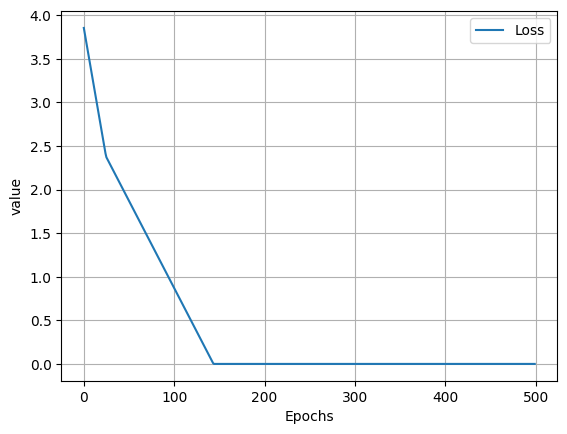

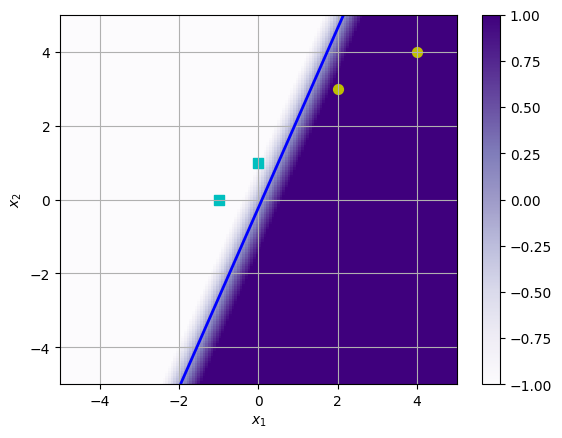

[-5, 5, -5, 5]

In [2]:
"""
Author: Fayyaz Minhas
A barebones single neuron model example with pytorch
You will need plotit for this (https://github.com/foxtrotmike/plotit)
Demonstrates:
    Representation, Evaluation and Optimization
    concept of loss functions, SRM objective function
    automatic differentiation
    optimization

"""
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn.modules as nn
import torch.optim as optim

#Let's generate some data
#inputs = 2*np.array([[0,0],[0,1],[1,0],[1,1]],dtype=np.float)-1
#targets = np.array([-1,-1,-1,1],dtype=np.float)
inputs = np.array([[-1,0],[0,1],[4,4],[2,3]])
targets = np.array([-1,-1,+1,+1])
device = torch.device('cpu')
#device = torch.device('cuda') # Uncomment this to run on GPU
x = torch.from_numpy(inputs).float()
y = torch.from_numpy(targets).float()
N, D_in,D_out = x.shape[0], x.shape[1], 1
# Loss function implementation
def hinge(y_true, y_pred):
    zero = torch.Tensor([0])
    return torch.max(zero, 1 - y_true * y_pred)
def sq_loss(y_true,y_pred):
    return (y_true-y_pred)**2
def logistic_loss(y_true,y_pred):
    return torch.log(1+torch.exp(- y_true * y_pred))
# Other loss functions can also be implemented
eps = 1e-6
# Create random Tensors for weights; setting requires_grad=True means that we
# want to compute gradients for these Tensors during the backward pass.
wb = torch.randn(D_in+1, device=device, requires_grad=True)
#Note: we have added one additional weight (for bias)
learning_rate = 0.01
optimizer = optim.SGD([wb], lr=learning_rate)
L = [] #history of losses
for epoch in range(500):
  # Forward pass: compute predicted y using operations on Tensors. Since w1
  # has requires_grad=True, operations involving w1 will cause
  # PyTorch to build a computational graph, allowing automatic computation of
  # gradients.
  epoch_loss = 0.0
  for i in range(len(y)):
      """
      # REPRESENTATION
      """
      w = wb[1:]
      b = wb[0]
      y_pred = torch.dot(w,x[i,:])+b #Implementing w'x+b
      """
      # EVALUATION
      """
      # Compute and print loss. Loss is a Tensor of shape (), and loss.item()
      # is a Python number giving its value.
      #loss = (y_pred - y).pow(2).mean() #loss = lossf(y_pred,y)
      loss = hinge(y[i],y_pred)
      #loss = logistic_loss(y_true,y_pred)
      obj = loss+0.0*torch.dot(w,w) #empirical loss + regularization
      epoch_loss+=loss#.item()

      """
      #OPTIMIZATION
      """
      # Use autograd to compute the backward pass. This call will compute the
      # gradient of loss with respect to all Tensors with requires_grad=True.
      # After this call w1.grad will be Tensors holding the gradient
      # of the loss with respect to w1.
      obj.backward()

      # Update weights using gradient descent. For this step we just want to mutate
      # the values of w1 in-place; we don't want to build up a computational
      # graph for the update steps, so we use the torch.no_grad() context manager
      # to prevent PyTorch from building a computational graph for the updates
      """
      with torch.no_grad():
          wb = wb - learning_rate * wb.grad
      wb.requires_grad = True
      """
      # Using built-in optimizer
      optimizer.step()
      optimizer.zero_grad()
  L.append(epoch_loss.detach().numpy()) #save for history and plotting


wbn = wb.detach().numpy()
def clf(inputs):
  return inputs@wbn[1:]+wbn[0]
plt.close("all")
plt.plot(L)
plt.grid(); plt.xlabel('Epochs'); plt.ylabel('value');plt.legend(['Loss','Objective'])
print("Predictions: ",clf(inputs))
print("Weights: ",wbn)
plt.figure()


plotit(inputs,targets,clf=clf,conts=[0],extent = [-5,+5,-5,+5])

## Exercise Questions

What happens if you:
1. change the input from bipolar to binary
2. change the targets from bipolar to binary
3. change the loss function
4. change the activation function. See if you can add an activation function (such as torch.tanh on the net input (y_pred) and study its impact on the classification? For prediction labels such as +1/-1, is it okay to use Rectified Linear (ReLU) activation?
5. change the regularization parameter
6. change the learning rate

Can you solve a linearly inseparable classification problem with this code? How?

Can you solve a regression problem with this approach?
